The set of points is:  [(-91, -85), (-64, -98), (-54, 90), (98, 62)]
The circular sequences is: 
[1, 2, 3, 4]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 4, 1, 3]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 2, 1]
[2, 2, 2, 0]
cr is 1.0


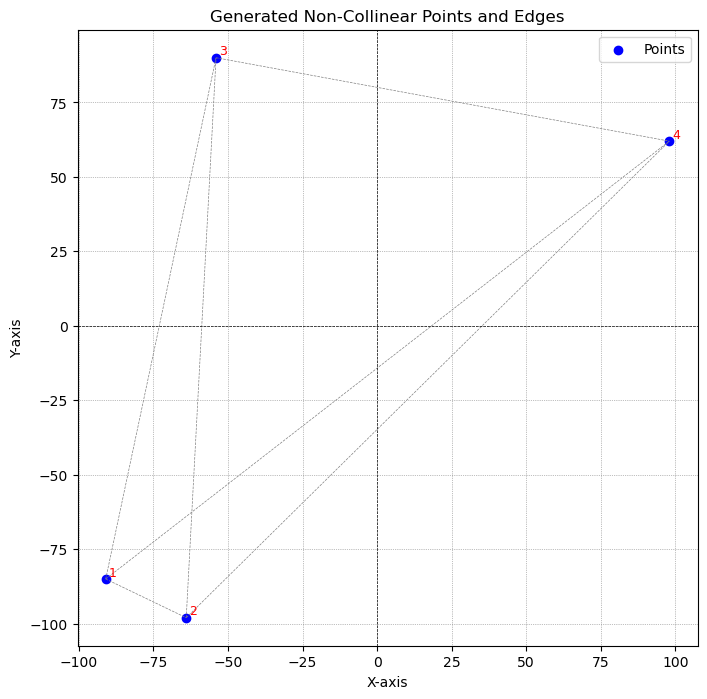

In [263]:
import random
import numpy as np
import matplotlib.pyplot as plt

NUM_POINT = 4 # How many number to generate 

def sort_points_by_x(points): # sort points by x coordinates
    return sorted(points,key=lambda l:l[0])

def generate_non_collinear_points(n, min_val=-100, max_val=100):
    points = []
    while len(points) < n:
        x, y = random.randint(min_val, max_val), random.randint(min_val, max_val)
        # Temporarily add the new point
        temp_points = points + [(x, y)]
        if len(temp_points) < 3 or not are_more_than_three_collinear(temp_points):
            points.append((x, y))
    points = sort_points_by_x(points)
    return points

def are_more_than_three_collinear(points):  # if 3 points are collinear, then it must have the same slope
    n = len(points)
    for i in range(n):
        slopes = {}
        for j in range(n):
            if i != j:
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                if dx == 0:
                    s = float('inf')  # Represent vertical slope
                else:
                    s = dy / dx
                slopes[s] = slopes.get(s, 0) + 1
        if any(count >= 2 for count in slopes.values()):
            return True
    return False

def find_slope(p,q): # p,q are lists p = [px,py]; q = [qx,qy], find slope
    if q[0] == p[0]:
        return float('inf')
    delta = (q[1]-p[1]) / (q[0]-p[0])
    return delta

def gather_slope(points): # find nC2 amount of slopes (n points)
    slope_list = []
    n = len(points)
    for i in range(n):
        for j in range(i,n):
            if i != j:
                slope = find_slope(points[i], points[j])
                slope_list.append(slope)
    return slope_list

def nC2(n): # this will print a list of [[1,2], [1,3], [1,4]...[1,n], [2,3], [2,4],...] the orderless nC2 combination
    nC2_list = []
    for i in range(1,n+1):
        for j in range(i+1,n+1):
            element = [i,j]
            nC2_list.append(element)
    return nC2_list

def sort_a_by_b(a,reference): # sort the nC2 comb list by the value of slopes -> circular sequence order
    indices = np.argsort(reference)
    a = [a[i] for i in indices]
    return a

number = NUM_POINT # number of points
points = generate_non_collinear_points(number)
print("The set of points is: ", points)
points_C_2 = nC2(number)
slope_list = gather_slope(points)
points_C_2_sorted = sort_a_by_b(points_C_2,slope_list)

# print circular sequence section
def switch_elements(list,u,v):
    a,b = list.index(u),list.index(v)
    list[a],list[b] = list[b],list[a]
    return list

def position_in_list(list,u,v):
    a, b = list.index(u), list.index(v)
    if a<b:
        return a
    else:
        return b

def print_circular_sequence(points_C_2_sorted,number): # create a list like [1,2,3...n] and print after each generation
    cs = []
    cs_position = [0] * number # indicate ej, where the sequence changes
    print("The circular sequences is: ")
    for i in range(number):
        cs.append(i+1)
    print(cs)
    for i in range(len(points_C_2_sorted)):
        u,v = points_C_2_sorted[i]
        cs = switch_elements(cs,u,v)
        position = position_in_list(cs,u,v)
        cs_position[position] += 1
        print(cs)
    return cs_position

cs_position = print_circular_sequence(points_C_2_sorted,number)
print(cs_position)

# apply-formula
def calculate_cr(cs_position,n):
    cr = 0
    for i in range(number-1):
        temp = cs_position[i] * ((n-2)*(n-3)/4 - i*(n-i-2))
        cr += temp
    return cr

print('cr is', calculate_cr(cs_position,number))


# plot section
def find_all_edges(points):
    edges = []
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((points[i], points[j]))
    return edges

def plot_points_and_edges(points, edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]

    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    
    for i, point in enumerate(points):
        plt.text(point[0] + 1, point[1] + 1, f"{i+1}", color='red', fontsize=9)

    for edge in edges:
        x_vals = [edge[0][0], edge[1][0]]
        y_vals = [edge[0][1], edge[1][1]]
        plt.plot(x_vals, y_vals, color='gray', linestyle='--', linewidth=0.5)

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.title('Generated Non-Collinear Points and Edges')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

edges = find_all_edges(points)
plot_points_and_edges(points, edges)


### Below is the brute force 

Number of intersections: 1


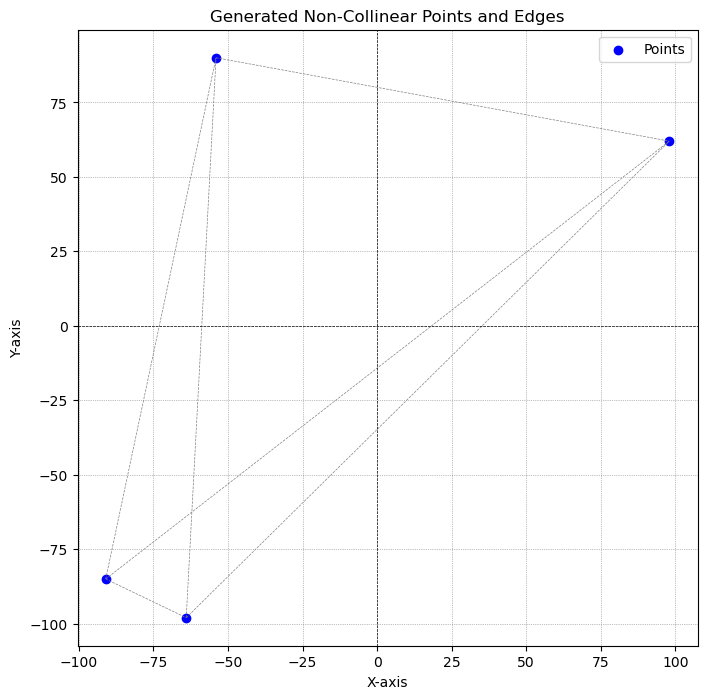

In [264]:

# check if two segment intersect 
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False
  
def orientation(p, q, r): 
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if (val > 0): 
        return 1
    elif (val < 0): 
        return 2
    else: 
        return 0
  
def doIntersect(p1, q1, p2, q2): 
    # Find orientations
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    return False
# end of intersect functions 

def generate_non_collinear_points(n, min_val=-100, max_val=100):
    points = []
    while len(points) < n:
        x, y = random.randint(min_val, max_val), random.randint(min_val, max_val)
        # Temporarily add the new point
        temp_points = points + [(x, y)]
        if len(temp_points) < 3 or not are_more_than_three_collinear(temp_points):  
            points.append((x, y))
    return points

def are_more_than_three_collinear(points): # if 3 points are collinear, then it must have the same slope 
    n = len(points)
    for i in range(n):
        slopes = {}
        for j in range(n):
            if i != j:
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                if dx == 0:
                    s = float('inf')  # Represent vertical slope
                else:
                    s = dy / dx
                slopes[s] = slopes.get(s, 0) + 1
        if any(count >= 2 for count in slopes.values()):
            return True
    return False

#BF to find all the edges with a given set of points 
def find_all_edges(points):
    edges = []
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((points[i], points[j]))
    return edges

# graph plotting 
def plot_points_and_edges(points, edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    
    for edge in edges:
        x_vals = [edge[0][0], edge[1][0]]
        y_vals = [edge[0][1], edge[1][1]]
        plt.plot(x_vals, y_vals, color='gray', linestyle='--', linewidth=0.5)
    
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.title('Generated Non-Collinear Points and Edges')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

edges = find_all_edges(points)

# Count crossings (excluding shared vertices)
c = 0
for i in range(len(edges)):
    for j in range(i + 1, len(edges)): 
        p1, q1 = edges[i]
        p2, q2 = edges[j]
        # Skip if the edges share a vertex
        if len(set([p1, q1, p2, q2])) < 4: # a set cannot have duplicates, so it can check if two edges contains the same vertex 
            continue
        if doIntersect(p1, q1, p2, q2):
            c += 1

print(f"Number of intersections: {c}")

# Plot the points and edges
plot_points_and_edges(points, edges)
